In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
quarterly_sales_agents = pd.read_csv("Top_5_Sales_Quarterly.csv")
quarterly_sales_agents.head()

,sales_agent,Q1_Revenue,Q2_Revenue,Q3_Revenue,Q4_Revenue,Total Sales
0,Darcel Schlecht,112255,310075,373218,357666,1153214
1,Vicki Laflamme,64433,106143,168738,139082,478396
2,Kary Hendrixson,92218,120913,111624,129543,454298
3,James Ascencio,45839,113796,128960,124938,413533
4,Reed Clapper,39748,135089,139919,123580,438336


In [27]:
top_5_agents = quarterly_sales_agents.iloc[:5]
top_5_agents

,sales_agent,Q1_Revenue,Q2_Revenue,Q3_Revenue,Q4_Revenue,Total Sales
0,Darcel Schlecht,112255,310075,373218,357666,1153214
1,Vicki Laflamme,64433,106143,168738,139082,478396
2,Kary Hendrixson,92218,120913,111624,129543,454298
3,James Ascencio,45839,113796,128960,124938,413533
4,Reed Clapper,39748,135089,139919,123580,438336


Creating column "rank" based on total sales

In [29]:
top_5_agents['Rank'] = top_5_agents['Total Sales'].rank(ascending=False, method='dense').astype(int)
top_5_agents

C:\Users\chris\AppData\Local\Temp\ipykernel_39612\3926146452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_agents['Rank'] = top_5_agents['Total Sales'].rank(ascending=False, method='dense').astype(int)


,sales_agent,Q1_Revenue,Q2_Revenue,Q3_Revenue,Q4_Revenue,Total Sales,Rank
0,Darcel Schlecht,112255,310075,373218,357666,1153214,1
1,Vicki Laflamme,64433,106143,168738,139082,478396,2
2,Kary Hendrixson,92218,120913,111624,129543,454298,3
3,James Ascencio,45839,113796,128960,124938,413533,5
4,Reed Clapper,39748,135089,139919,123580,438336,4


In [33]:
top_5_agents = top_5_agents.sort_values('Rank')
top_5_agents

,sales_agent,Q1_Revenue,Q2_Revenue,Q3_Revenue,Q4_Revenue,Total Sales,Rank
0,Darcel Schlecht,112255,310075,373218,357666,1153214,1
1,Vicki Laflamme,64433,106143,168738,139082,478396,2
2,Kary Hendrixson,92218,120913,111624,129543,454298,3
4,Reed Clapper,39748,135089,139919,123580,438336,4
3,James Ascencio,45839,113796,128960,124938,413533,5


Creating a stacked bar chart

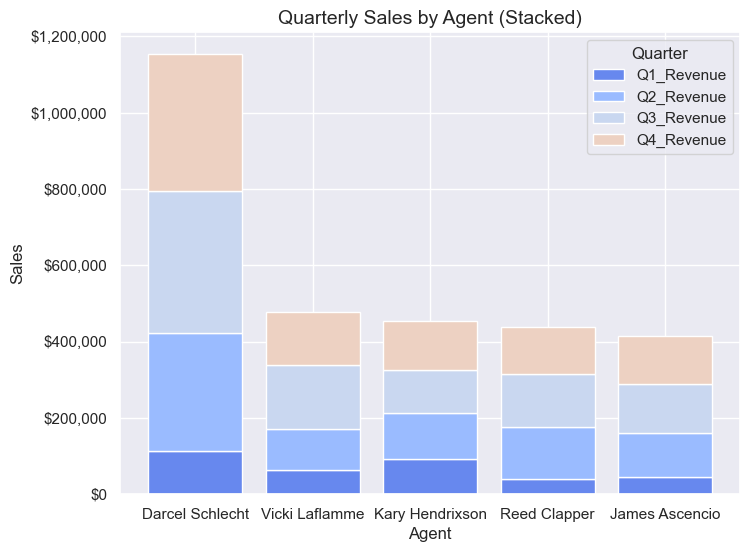

In [79]:
sns.set(style="darkgrid")
sns.set_palette("coolwarm")

fig, ax = plt.subplots(figsize=(8, 6))

quarters = ['Q1_Revenue', 'Q2_Revenue', 'Q3_Revenue', 'Q4_Revenue']
bottoms = [0] * len(top_5_agents)


for quarter in quarters:
    sales = top_5_agents[quarter]
    ax.bar(top_5_agents['sales_agent'], sales, bottom=bottoms, label=quarter)
    bottoms = [sum(x) for x in zip(bottoms, sales)]

ax.set_title('Quarterly Sales by Agent (Stacked)', fontsize=14)
ax.set_xlabel('Agent', fontsize=12)
ax.set_ylabel('Sales', fontsize=12)
ax.legend(title='Quarter')

import matplotlib.ticker as mtick

# Apply a dollar format to the y-axis
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.show()

Let's track the quarterly performance for each regional office. 

In [77]:
regional_quarterly_sales = pd.read_csv("Regional_Sales_Quarterly.csv")
regional_quarterly_sales
rqs = regional_quarterly_sales
rqs

,regional_office,Q1_Revenue,Q2_Revenue,Q3_Revenue,Q4_Revenue,Total Sales
0,West,457533,1111967,1009286,989861,3568647
1,Central,347988,957321,1053202,987782,3346293
2,East,329151,1016823,919767,824853,3090594


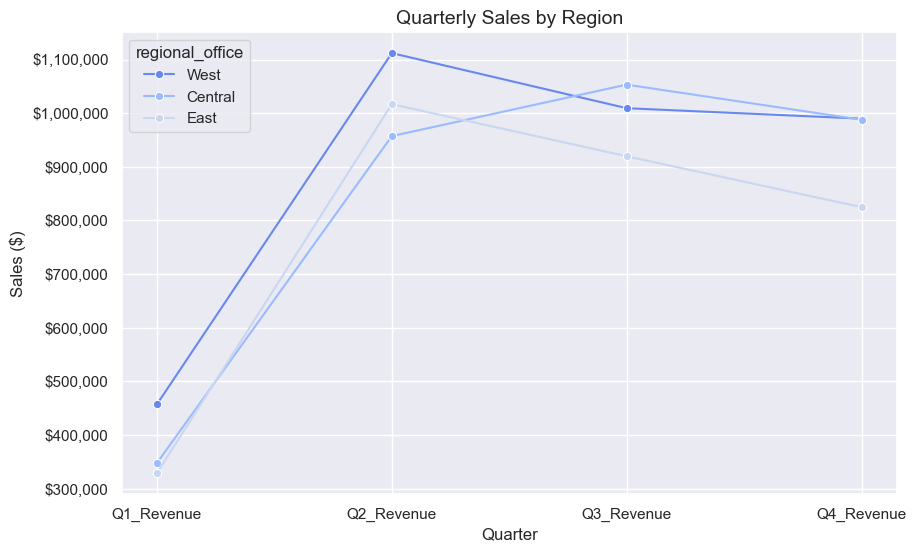

In [247]:
rqs_long = rqs.melt(id_vars=['regional_office'], value_vars=['Q1_Revenue', 'Q2_Revenue', 'Q3_Revenue', 'Q4_Revenue'],
                   var_name='Quarter', value_name='Sales')

plt.figure(figsize=(10, 6))

#creating the line plot
sns.lineplot(data=rqs_long, x='Quarter', y='Sales', hue='regional_office', marker='o')

plt.title('Quarterly Sales by Region', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)

# Format y-axis as dollar values
import matplotlib.ticker as mtick
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# Show the plot
plt.show()


Let's view the wins and losses of the ten best-selling agents. 

In [84]:
agents_wl = pd.read_csv('agents_win_losses.csv')
agents_wl.head()

,sales_agent,Wins,Losses,win_loss_ratio
0,Hayden Neloms,107,45,2.38
1,Maureen Marcano,149,64,2.33
2,Wilburn Farren,55,24,2.29
3,Cecily Lampkin,107,53,2.02
4,Versie Hillebrand,176,88,2.00


Let's rank this in descending order based on wins. 

In [87]:
agents_wl_sorted = agents_wl.sort_values(by = 'Wins', ascending = False)
agents_wl_sorted.head(20)

,sales_agent,Wins,Losses,win_loss_ratio
17,Darcel Schlecht,349,204,1.71
14,Vicki Laflamme,221,126,1.75
19,Kary Hendrixson,209,126,1.66
21,Anna Snelling,208,128,1.62
4,Versie Hillebrand,176,88,2.00
13,Kami Bicknell,174,98,1.78
11,Jonathan Berthelot,171,93,1.84
20,Cassey Cress,163,98,1.66
22,Zane Levy,161,100,1.61
27,Donn Cantrell,158,117,1.35


Let's create a new df containing the top 5 and bottom 5 agents in total wins.

In [90]:
top_5 = agents_wl_sorted.head(5)
bottom_5 = agents_wl_sorted.tail(5)
df = pd.concat([top_5, bottom_5])
df

,sales_agent,Wins,Losses,win_loss_ratio
17,Darcel Schlecht,349,204,1.71
14,Vicki Laflamme,221,126,1.75
19,Kary Hendrixson,209,126,1.66
21,Anna Snelling,208,128,1.62
4,Versie Hillebrand,176,88,2.00
15,Elease Gluck,80,46,1.74
12,Rosie Papadopoulos,78,43,1.81
24,Garret Kinder,75,48,1.56
10,Rosalina Dieter,72,38,1.89
2,Wilburn Farren,55,24,2.29
